In [36]:
import pandas as pd
import openpyxl
import numpy as np
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance as dist
import copy

In [37]:
basepath="/Users/kazuki/Documents/Study/test/data/ryukyu4/{}"
rflocate = basepath.format("parameter/locations.xlsx")
rfword   = basepath.format("parameter/sheetlist.xlsx")
rfpattern= basepath.format("gram1/phcounter/counter.xlsx")
picpath="/Users/kazuki/Documents/Study/test/data/ryukyu4/pic/{}"
gnumber=3

In [38]:
locateDf = pd.read_excel(rflocate, sheet_name=0, header=0, index_col=0)
wordDf  = pd.read_excel(rfword , sheet_name=0, header=0, index_col=0)

In [39]:
symbols=list(locateDf.iloc[:,0])
locates = list(locateDf.iloc[:,2])
hyouzi = list(locateDf.iloc[:,1])
words   = list(wordDf.iloc[:,0])

In [40]:
ptDf=pd.read_excel(rfpattern, sheet_name=0, header=0, index_col=0)

In [41]:
ptDf=ptDf.T
distanceMatrix=np.array(ptDf.values)

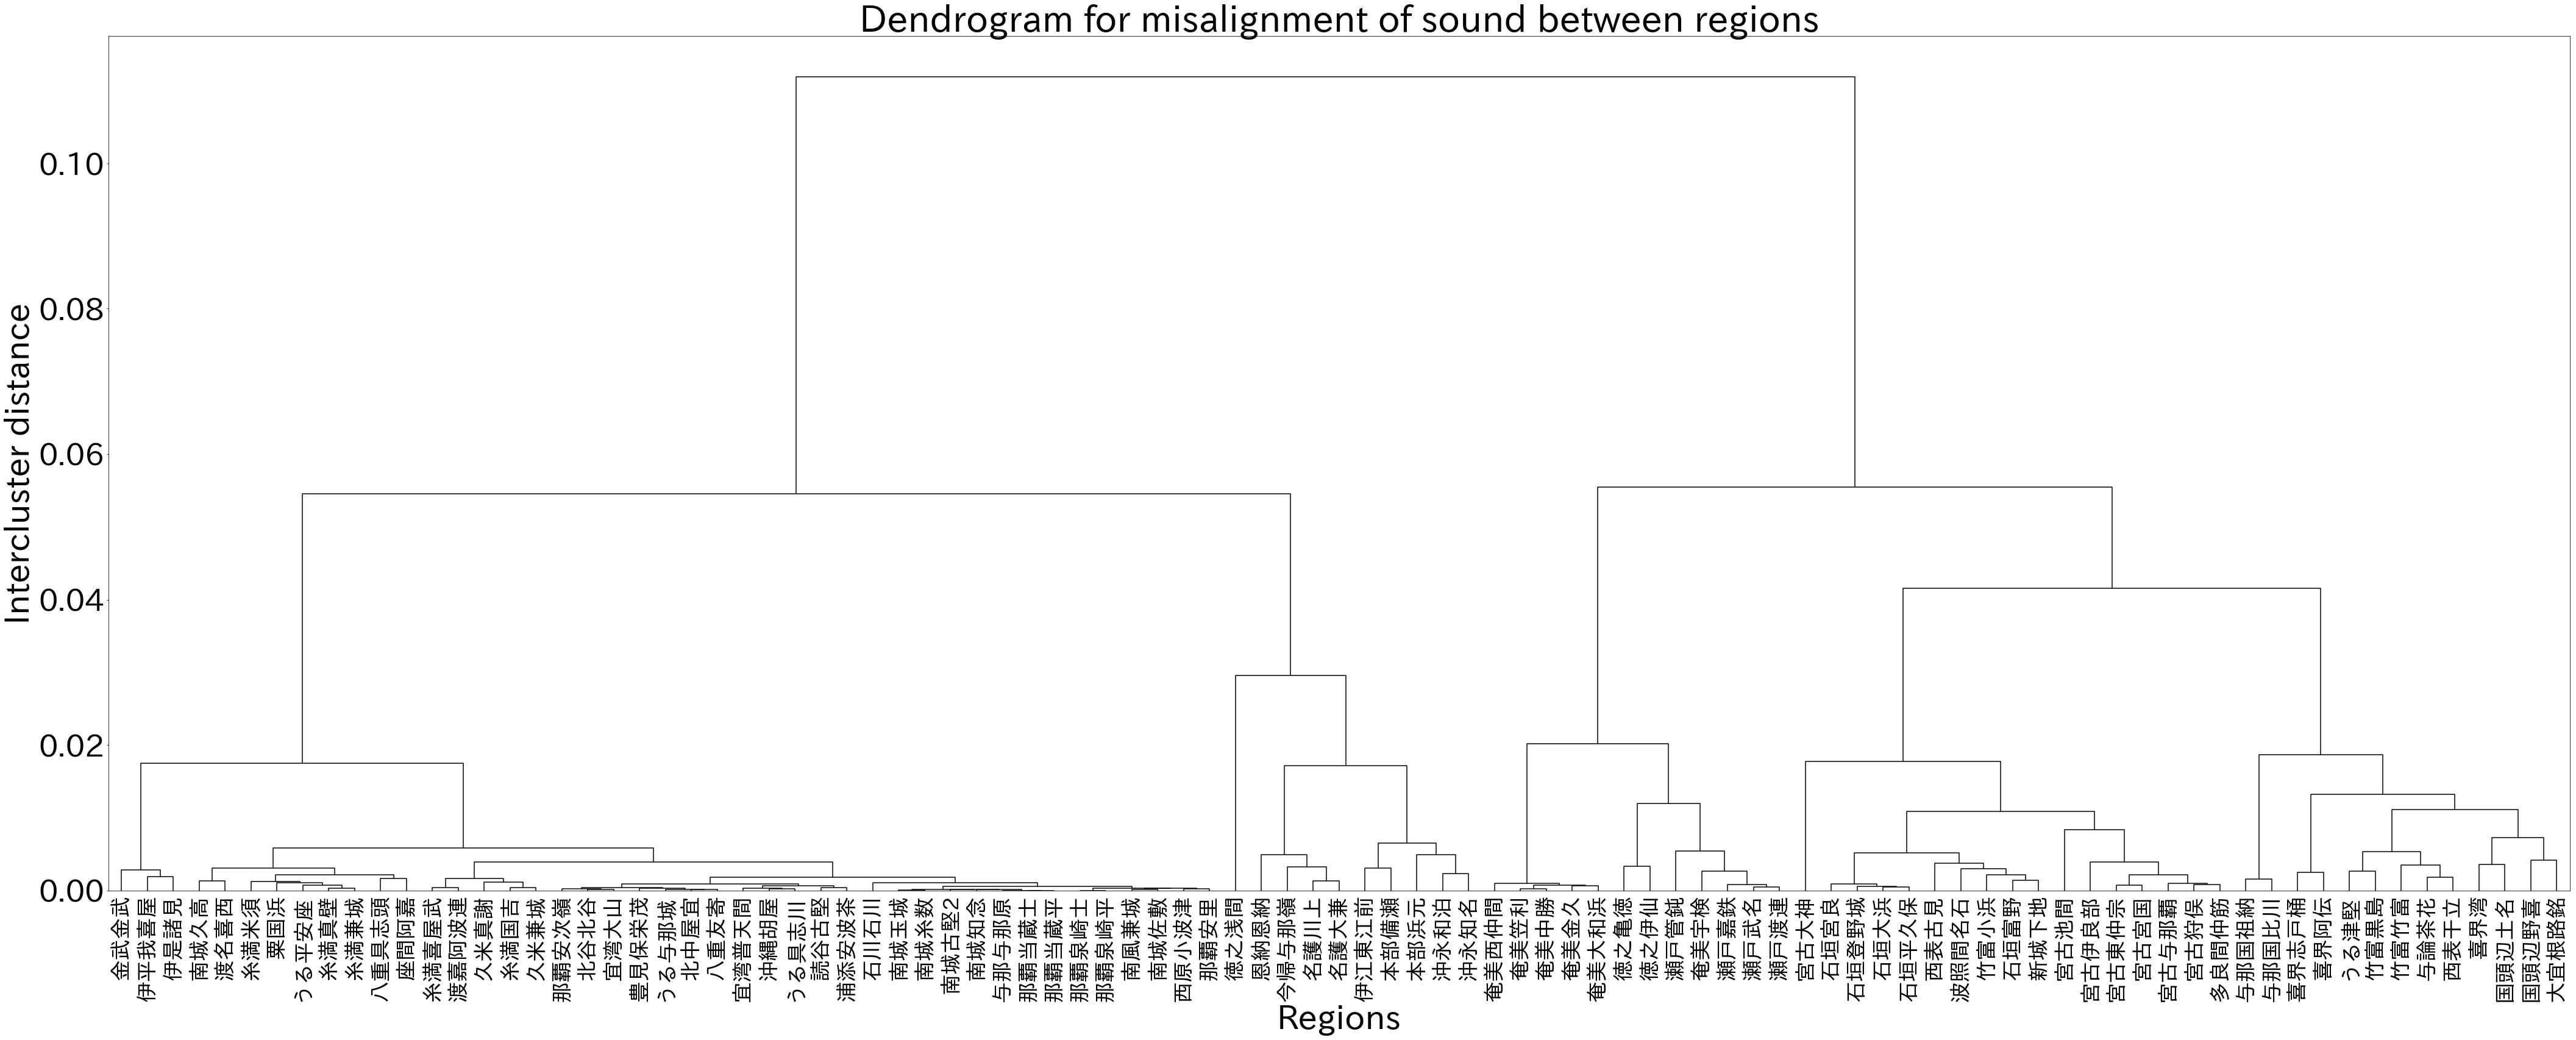

In [42]:
#図の生成
figtitle='Dendrogram for misalignment of sound between regions'
himethod='ward'
# savefile=basepath.format("gramTri/pic/dendAD.png")
pdis=dist.pdist(distanceMatrix,'cosine')
z = hierarchy.linkage(pdis, method=himethod,metric="cosine")

plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Regions', fontsize=55)
plt.ylabel('Intercluster distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
# plt.savefig(savefile)
plt.show()
plt.close()

In [43]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.ix[i][0])
        n2 = int(df1.ix[i][1])
        val = df1.ix[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [44]:
labels=get_cluster_by_number(z,6)

/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/kazuki/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-

In [45]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 4, 4, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1]


In [46]:
import folium
from folium.plugins import FastMarkerCluster

In [47]:
basepath2="/Users/kazuki/Documents/Study/data/ryukyu3/{}"
rfid=basepath2.format(
        "テスト用数値一覧・地点_緯度経度20190313.csv")
idodf=pd.read_csv(rfid,header=0,index_col=0)
# idokeido=idodf.loc["旧笠利町笠利":,["緯度","経度"]]

In [48]:
idokeido=idodf.loc["旧笠利町笠利":,["緯度","経度"]]

In [49]:
# color_set=["#000000","#800000",
#     "#ff0000","#800080",
#     "#ff8c00","#ff00ff",
#     "#008000","#808000",
#     "#000080","#ff6633"]
color_set=list(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [50]:
# copyright_osm = '&copy; <a href="http://osm.org/copyright">OpenStreetMap</a> contributors'

In [51]:
truelabel=[0 for i in locates]

In [52]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
95


In [53]:
for i,loc in enumerate(locates):
    if i >= 93:
        truelabel[i]=5
    elif i>=81 and i < 93:
        truelabel[i]=4
    elif i>=73 and i<81:
        truelabel[i]=3
    elif i>=32 and i<73:
        truelabel[i]=2
    elif i>=16 and i<32:
        truelabel[i]=1
    elif i>=0 and i<16:
        truelabel[i]=0

In [32]:
print(truelabel)
print(len(truelabel))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]
95


# ラベルの一致

In [33]:
truelabels2=[0 for i in locates]
asignlabels=[0 for i in range(6)]
locindex=[0,16,32,73,81,93,95]
for i in range(6):
    a=i
    b=labels[locindex[i]:locindex[i+1]]
#     print(b)
    labels_unique=sorted(list(set(b)))
    print(labels_unique)
    label_c=[0 for j in labels_unique]
    for j,jc in enumerate(labels_unique):
        label_c[j]=b.count(jc)
    souwa=sum(label_c)
    for j,jc in enumerate(labels_unique):
        label_c[j]=label_c[j]/sum(label_c)
#     print(label_c)
    asignlabels[i]=labels_unique[label_c.index(max(label_c))]
#     print(asignlabels)
for i in range(len(locates)):
    truelabels2[i]=asignlabels.index(labels[i])

[0, 1, 2, 3]
[2, 3, 4]
[3]
[5]
[2, 3, 5]
[2]


ValueError: 0 is not in list

In [22]:
print(truelabels2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5]


In [23]:
# 一致率の計算
seihi=0
for a,b in zip(truelabel,truelabels2):
    if a==b:
        seihi=seihi+1
seihi=seihi/len(truelabel)
print(seihi)

0.968421052631579


In [ ]:
_map = folium.Map(location=list(idokeido.iloc[25,:].values),
                  attr="Stamen Watercolor")
for i,(idkd,label) in enumerate(zip(list(idokeido.values),labels)):
    folium.CircleMarker(
        popup='{}'.format(hyouzi[i]),
        location= idkd,
        radius=4,
        color=color_set[label],
        fill=True,
        fill_color=color_set[label]
    ).add_to(_map)
# _map.save(basepath.format("gram3/pic/map-N3-D.html"))

In [54]:
# _map.save(picpath.format("map-N{}-D.html".format(gnumber)))

In [55]:
_map

In [26]:
new_color=[0 for i in range(6)]
new_color_ind=[4,3,0,5,2,1]
for i in range(6):
    new_color[i]=color_set[new_color_ind[i]]

In [27]:
print(new_color)
print(color_set)

['#9467bd', '#d62728', '#1f77b4', '#8c564b', '#2ca02c', '#ff7f0e']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


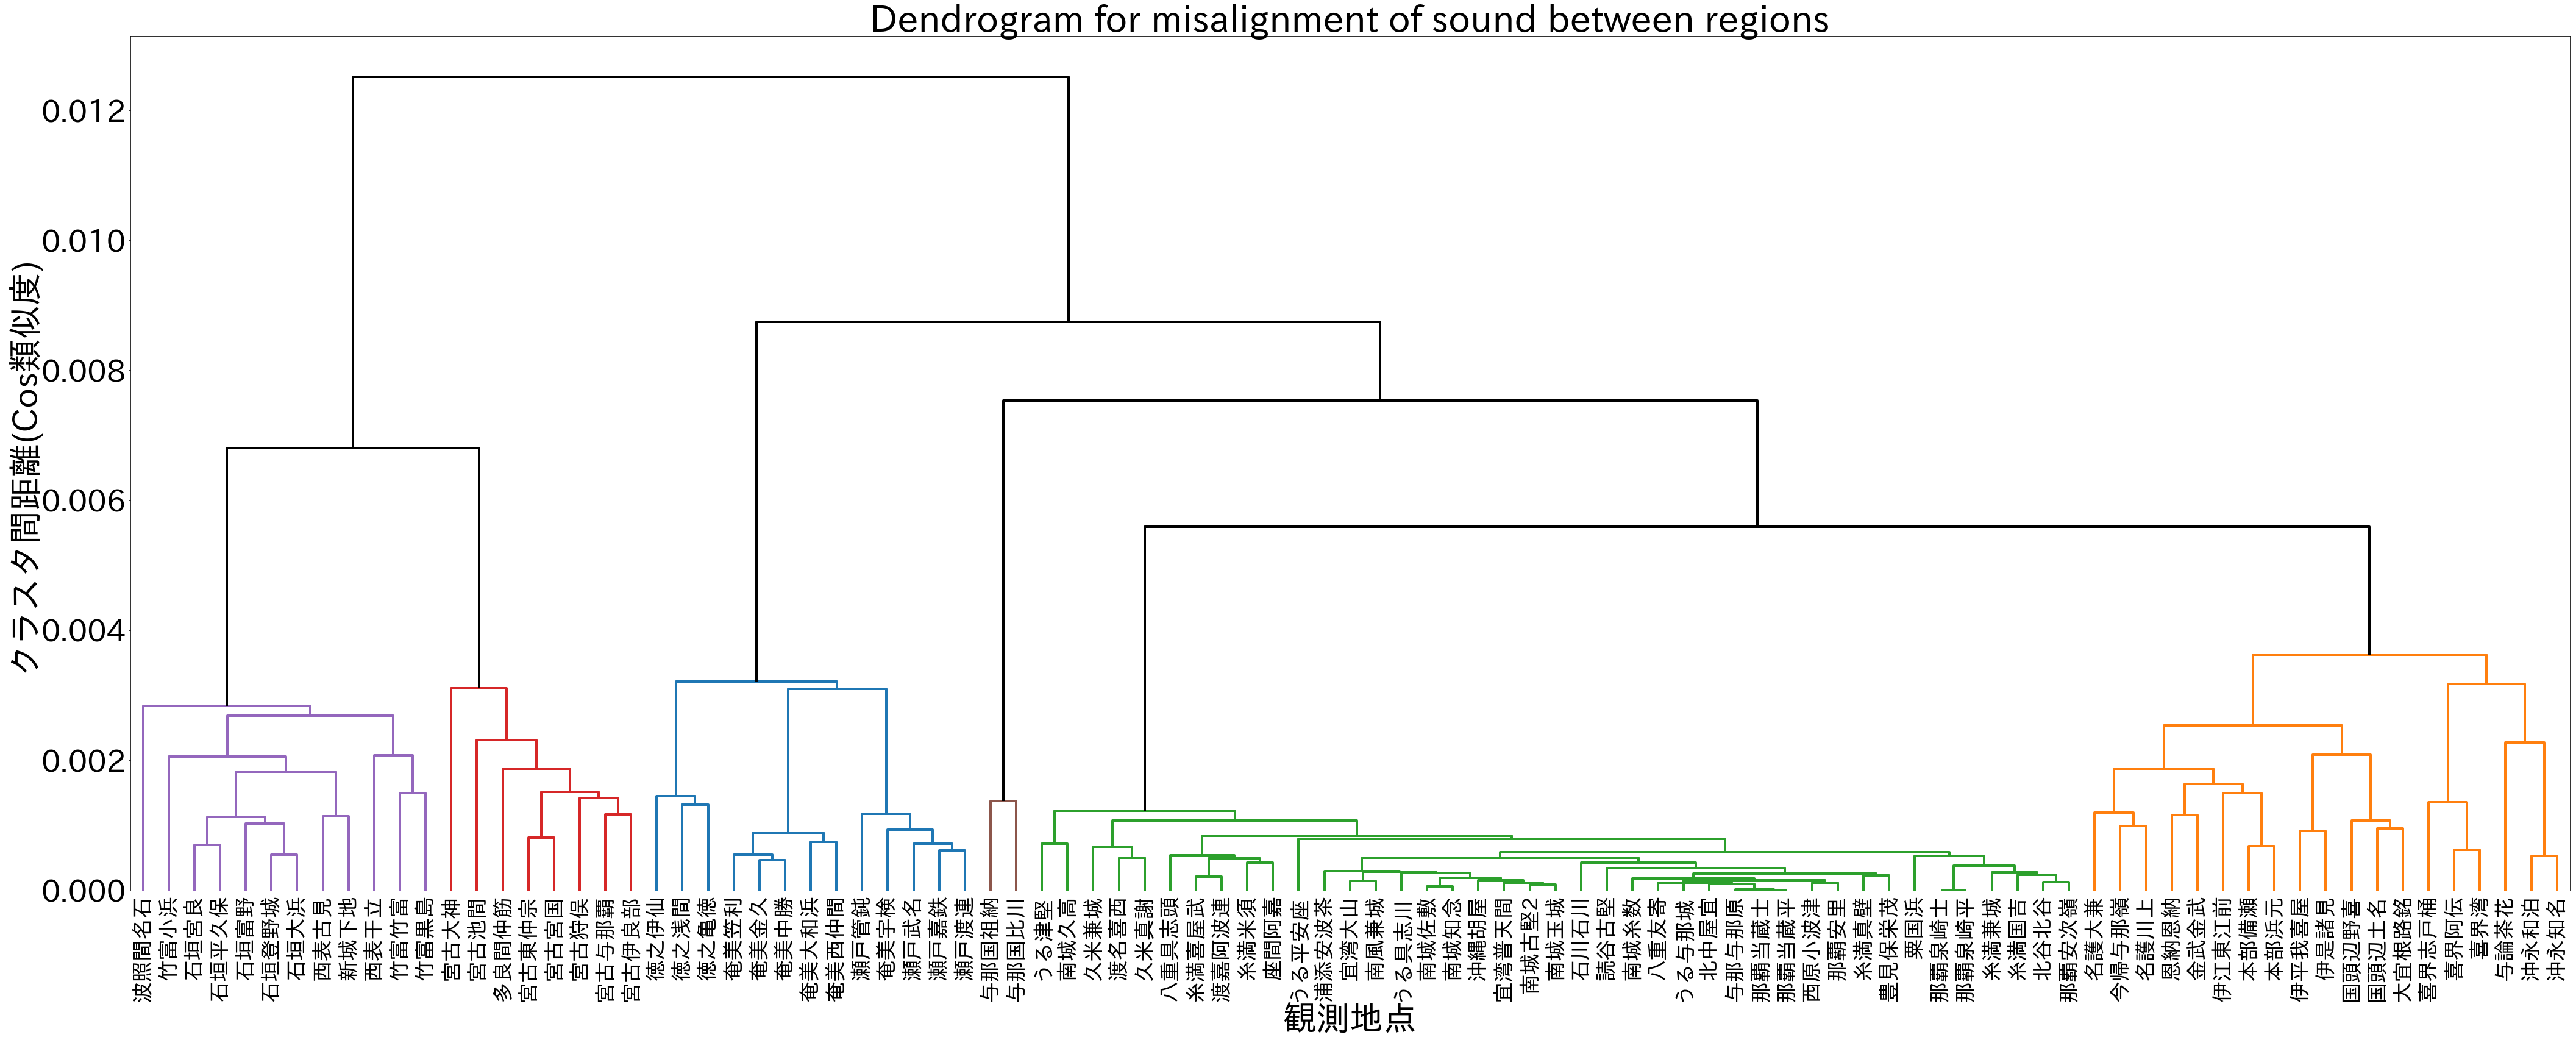

In [28]:
plt.figure(figsize=(60,25))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.rcParams['lines.linewidth'] = 4
plt.title(figtitle, fontsize=60)
plt.xlabel('観測地点', fontsize=55)
plt.ylabel('クラスタ間距離(Cos類似度)', fontsize=55)
hierarchy.set_link_color_palette(new_color)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0.005, # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(locates)) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(picpath.format("dend-N{}-D.png".format(gnumber)))
plt.show()
plt.close()